# **RANDOM FOREST**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![speed_bikes](https://drive.google.com/uc?export=view&id=1ZhiNYk4pka4lqzbrjGFm5cFk_SWjdBAW)

Fuente de la imagen: Imagen propia


## **1. Introducción a los Algoritmos Ensamblados**

En el primer tema del módulo vimos los Árboles de Decisión (a partir de ahora AD). Se trata de un algoritmo que tiene unas ventajas que lo diferencian de otros, como son la facilidad de preprocesamiento de los datos, su capacidad para darnos información sobre el modelo o la posibilidad de usarlos tanto en Clasificación como en Regresión. 

Sin embargo, ya adelantamos que tiene otra característica que lo hace realmente importante en el mundo del Machine Learning. Se trata de la posibilidad de lanzar cualquier número de ellos tanto en paralelo como en serie.

* **En paralelo**: se entrenan decenas o cientos de AD a la vez y se decide que la estimación resultante se calcule a partir de todas sus estimaciones. 
* **En serie**: se entrenan los AD de manera que cada uno trata de mejorar las deficiencias de los anteriores.

Random Forest pertenece al primer tipo y, tanto GradientBoosting como AdaBoost, al segundo.

Vamos a comenzar con Random Forest.


## **2. Introducción a Random Forest**

Ramdom Forest es un tipo de algoritmo basado en Bagging.

He encontrado en wikipedia una buena definición de este término:

**Bootstrap Aggregation**, *también llamada **Bagging** (o "ensacado"), es un meta-algoritmo de aprendizaje automático ensamblado diseñado para mejorar la estabilidad y precisión de los algoritmos de aprendizaje automático utilizados en la clasificación y regresión estadísticas. También reduce la variación y ayuda a evitar el sobreajuste (overfitting). Aunque normalmente se aplica a métodos de árbol de decisión, se puede utilizar con cualquier tipo de método.*

Para explicar este algoritmo me voy a basar en la siguiente imagen. En ella se muestra un ejemplo de Clasificación.

![RF_wiki](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

*Fuente: en.wikipedia.org*

Lo que se puede ver es la manera en que Random Forest lleva a cabo una estimación para una nueva instancia. Es interesante que os fijéis en los siguientes detalles:

1. Cuando llega la instancia, con sus K variables predictoras $X_0, X_1, ..., X_k$ se ejecuta su predicción en "n" AD al mismo tiempo (en paralelo)
2. En cada uno de los AD el recorrido de nuestra instancia es diferente. Esto es debido a que los AD son diferentes.
3. Los AD son de poca profundidad.
4. Al tratarse de un problema de Clasificación el resultado final viene dado por la clase que ha salido de manera mayoritaria en todos sus AD. 









<br>
<p><mark>RECUERDA </mark></p>
<hr>

En Scikit Learn somos capaces, mediante el uso de sus parámetros, de podar en profundidad ("max_depth", "min_samples_split" y otras) y de elegir el número de variables predictoras ("max_features").  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html





## **3. Generación de un modelo de Random Forest**

Vamos a ver los pasos (a grandes rasgos) que se dan en su generación:




### **3.1. Número de Árboles de Decisión** 
Lo primero es decidir el número de AD que se van a ejecutar. Para ello vamos a poder usar el parámetro "n_estimators", que por defecto está en 100. Cuanto mayor es este número mejor se comportará el modelo. En contra tiene que va a tardar más en realizar el entrenamiento ya que tiene que ajustar 100 AD a los datos.


### **3.2. Bootstrapping de las instancias**

Vamos a ver cómo se produce la configuración de los AD: esto se lleva a cabo gracias a una técnica denominada **Bootstrapping**. Si tenemos un dataset de entrenamiento de $N$ filas, se generan muestras aleatorias de $n$ filas (con $n\leq N$). Además, se trata de muestras con reemplazamiento, lo que nos lleva a que habrá filas que aparezcan en varios AD diferentes. EL parámetro "n_samples" de Scikit Learn nos permite decidir el valor de $n$. Por defecto, $n=N$.

![Bootstrapping](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/1024px-Ensemble_Bagging.svg.png)

*Fuente: en.wikipedia.org*


### **3.3. Selección aleatoria de variables**

Ahora vamos a ver la característica especial que tiene Random Forest en lo referente a modelos de Bagging. 

Además de la selección aleatoria de filas, también se produce una selección aleatoria de columnas (variables o features). 

En principio podríamos pensar que cada AD tiene unas variables distintas de los demás. Pero el algoritmo va mucho más allá. Se realiza una nueva selección aleatoria de variables **en cada split** del AD, en cada decisión.

Por tanto, en un mismo AD se utilizan varios grupos de variables predictoras diferentes. 

Scikit Learn nos da la posibilidad de elegir el número de variables a usar en cada una de estas decisiones (splits). El parámetro se llama **max_features**.



## **4. El parámetro "max_features"**

Vamos a analizar cómo afecta este parámetro en el modelo final:

* **Si es igual al número de variables predictoras** (max_features = len(train.columns)): entonces no existe una selección aleatoria de columnas. Sólo se mantiene el *bootstrapping* de filas. Estaríamos hablando de un modelo de Bagging puro.

* **Si se trata de un número alto aunque no igual al número de variables predictoras** (max_features < len(train.columns)): en este caso, se pierde en parte la característica principal de Random Forest por la que se usan grupos diferentes en las decisiones. Podemos llegar a correr el riesgo de hacer overfitting.

* **Si se trata de un número mucho más bajo que el número de variables predictoras**: los AD se configuran con pocas variables y se hacen muy simples; posibilidad de underfitting.







## **5. Predicción en algoritmos de Clasificación**

En Scikit Learn la predicción en problemas de Clasificación no se hace por simple votación. Es decir, es posible que si se lanzan 100 AD, y tenemos 60 que predicen clase 0 y 40 que clase 1, la clase final sea 1 (aunque tenga menos votos).

Esto es así porque el cálculo se hace mediante el voto ponderado con la probabilidad de cada clase en los diferentes AD.

**Ejemplo:** 

Ejecutamos Random Forest con 100 AD sobre un dataset de clasificación binaria.

Al lanzar los 100 AD, además de calcular el "predict", también calculamos el "predict_proba" (visto en otros temas).
Se realiza de esta manera:

$$class^0 = \frac{proba_1^0+proba_2^0+...+proba_n^0}{n}$$

$$class^1 = \frac{proba_{1}^1+proba_{2}^1+...+proba_n^1}{n}$$

donde:

$class^0$ es el resultado de la media de las probabilidades de que el resultado sea clase=0 de cada AD.

$class^1$ es el resultado de la media de las probabilidades de que el resultado sea clase=1 de cada AD.

EL valor mayor de los dos anteriores es el que "gana" y nos dice la clase resultante de Random Forest.

<br>
<p><mark>RECUERDA </mark></p>
<hr>
Cuando llamamos a la función "predict_proba" devuelve tantas probabilidades como clases hay en el dataset. En el caso de un problema binario tendremos dos probabilidades por cada AD. Para un AD cualquiera "i" de Random Forest tendremos:

$[proba_i^0, proba_i^1]$



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
print (X.shape)
print (y.shape)

(1000, 2)
(1000,)


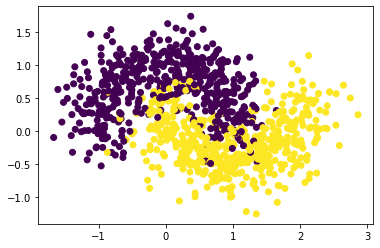

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [ ]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

350
350
150
150


In [ ]:
rf_model = RandomForestClassifier(random_state=0, n_estimators=5, max_samples=0.5, max_depth=2)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 85.71
Precisión sobre los datos de test: 91.00


In [ ]:
## probabilidades en la predicción de la clase 0 y 1, del primer AD
rf_model.estimators_[2].predict_proba(X_test)[0:5]

array([[0.28985507, 0.71014493],
       [0.63461538, 0.36538462],
       [0.28985507, 0.71014493],
       [0.63461538, 0.36538462],
       [0.98837209, 0.01162791]])

**Grafo en Python**

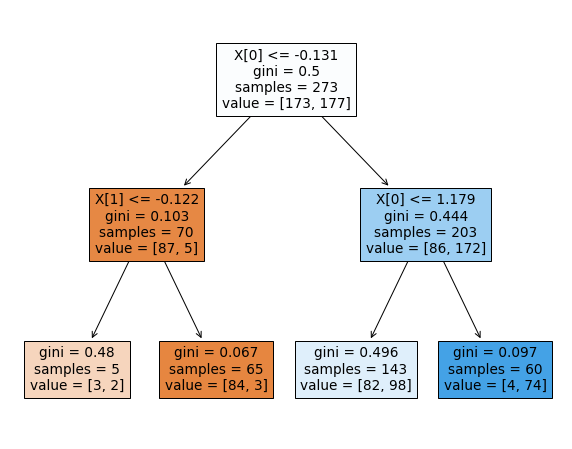

In [ ]:
from sklearn.tree import plot_tree, export_graphviz
plt.figure(figsize=(10,8))
plot_tree(rf_model.estimators_[0], filled=True, max_depth=2)
plt.show()

In [ ]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

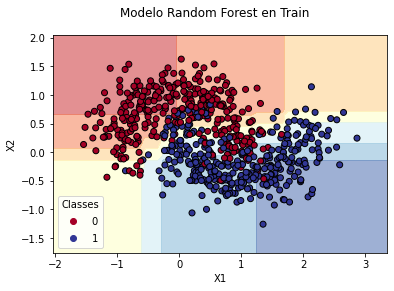

In [ ]:
plot_boundaries_test(X_train, y_train, rf_model, True, X_train, y_train, "Modelo Random Forest en Train")

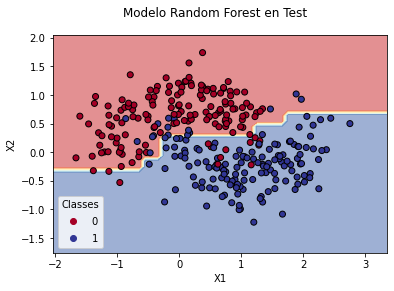

In [ ]:
plot_boundaries_test(X_train, y_train, rf_model, False, X_test, y_test,"Modelo Random Forest en Test")

## **6. Predicción en algoritmos de Regresión**

El resultado final de un algoritmo de Random Forest en el caso de Regresión es la media de los resultados de los AD.

Sin embargo, Scikit Learn nos permite conocer el resultado de cada uno y así poder calcular otras métricas diferentes a la media.



```
rf_model.estimators_[0].predict(X_test)
```
nos devuelve las predicciones de los datos de test, pero sólo del primer AD.


## **7. Análisis de "boundaries"**

La intención de este punto es ver cómo reacciona el modelo ante cambios en sus parámetros. Cuando hablamos de "boundaries" nos referimos a la frontera entre las diferentes clases generadas por el modelo.

Cuanto mayor es el número de AD más suave se vuelve la frontera.

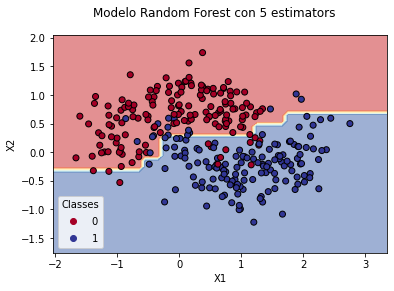

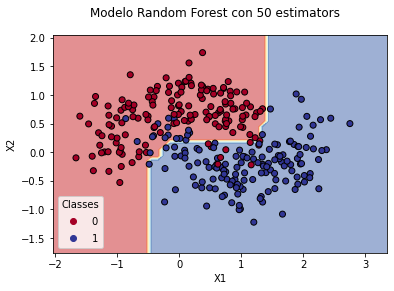

In [ ]:
for n in [5, 50]:
  rf_model = RandomForestClassifier(random_state=0, n_estimators=n, max_samples=0.5, max_depth=2)
  rf_model.fit(X_train, y_train)
  pred_train = rf_model.predict(X_train)
  pred_test = rf_model.predict(X_test)
  plot_boundaries_test(X_train, y_train, rf_model, False, X_test, y_test,f"Modelo Random Forest con {n} estimators")

Vamos a ver los diferentes modelos de cada AD

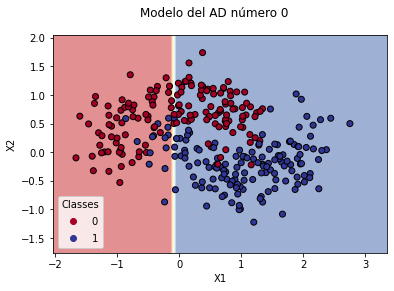

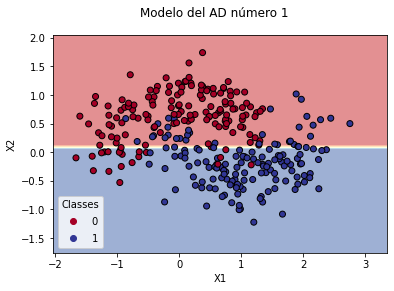

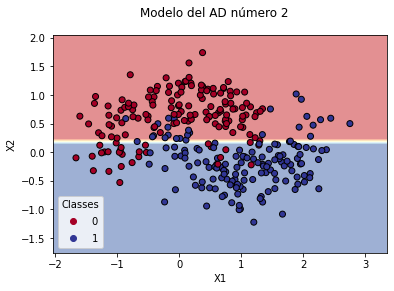

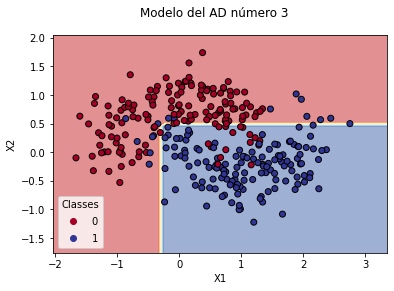

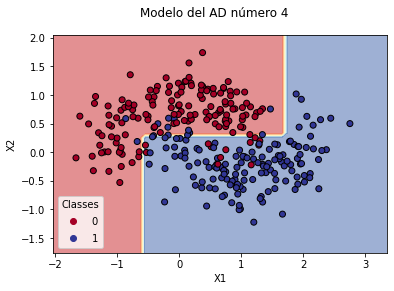

In [ ]:
rf_model = RandomForestClassifier(random_state=0, n_estimators=5, max_samples=0.5, max_depth=2)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

for i in range(5):
  plot_boundaries_test(X_train, y_train, rf_model.estimators_[i], False, X_test, y_test,f"Modelo del AD número {i}")

## **8. Importancia de las variables**
Dado que Random Forest es un ensamblado de AD, también tiene la capacidad de darnos la importancia dada a cada una de las variables predictoras.

Puesto que lleva a cabo un uso aleatorio de grupos de variables en cada AD, el número de variables con importancia va a ser mayor que en un AD. 

La simple sentencia:

```
rf_model.feature_importances_
```
nos devuelve lo que buscamos.

Haciendo uso del dataset de las clases que vimos en el primer tema, vamos a ver qué resultados nos da Random Forest.


In [ ]:
## Carga de los datos
from sklearn.datasets import load_wine
data = load_wine()
## Creación del dataframe
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["class"])
df_all = pd.concat([df_features, df_target],axis=1)
## Split en Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    stratify=df_target.values, 
                                                    random_state=42, test_size=0.3)
## Generación del modelo
rf_model = RandomForestClassifier(random_state=0, n_estimators=5, max_samples=0.5, max_depth=2, max_features="auto")
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 96.77
Precisión sobre los datos de test: 96.30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


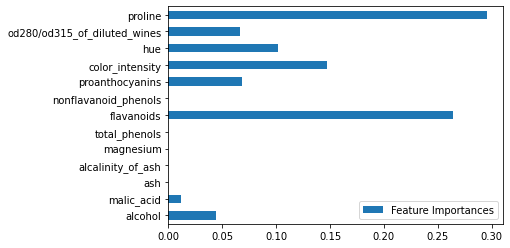

In [ ]:
df_imp = pd.DataFrame(rf_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Cuando se usó AD sólo, nos dió tres variables con importancia mayor que cero (flavanoids, ash y color-intensity). Esta vez han aparecido más y "proline" es la que más importancia recibe.

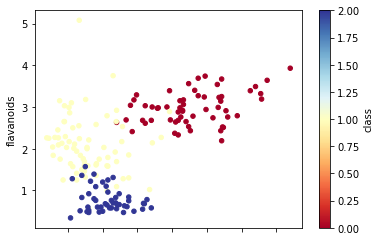

In [ ]:
df_all.plot.scatter(x="proline", y="flavanoids", c="class", cmap=plt.cm.RdYlBu)

Se puede ver cómo las dos variables con más importancia también dibujan un gráfico con las clases fácilmente diferenciables. Esta vez, la clasificación se puede hacer con un dibujo de fronteras de mejor calidad que con un AD sólo.

Miremos la matriz de confusión de los resultados de test.

Confusion matrix:



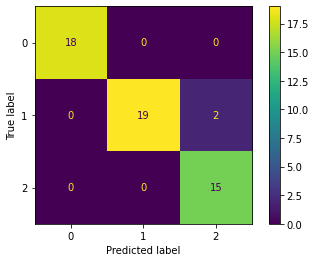

In [ ]:
from sklearn.metrics import plot_confusion_matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

## **9. Parámetros más importantes**

### **9.1. n_estimators**

Como ya hemos visto, el número de AD del modelo nos lleva a unas fronteras más o menos suaves.

Cuanto mayor es su número, más robusto es el modelo contra "overfitting". 

Desde no hace mucho, Scikit Learn subió de 10 a 100 el número de AD. En cualquier caso, si el entrenamiento se hace muy largo y precisa de mucha RAM, se puede ir haciendo pruebas de rendimiento del modelo para menos AD. En muchas ocasiones, con 10 puede ser suficiente para un proyecto medio grande.

### **9.2. max_features**

Además de lo ya comentado anteriormente, quisiera comentar algunas de las modalidades de este parámetro en función del valor que le demos.

Por defecto tiene el valor "auto". Vamos a considerar que el número de variables predictoras (features) es F.

* **auto**: en Clasificación es $\sqrt{F}$; en Regresión es $F$, por lo que siempre usa todas las features (Bagging puro). Es recomendable cambiarlo a "sqrt".
* **sqrt**: es $\sqrt{F}$; en Clasificación es lo mismo que dejar el valor por defecto "auto".
* **log2**: es $log_2(F)$
* Si escribimos un número entero, éste será el máximo.
* Si escribimos un decimal entre 0 y 1, éste representará la proporción. Por ejemplo, si escribimos 0.5, se escogeran grupos con número máximo igual a la mitad del número de features.


### **9.3. random_state**

Al igual que en otros algoritmos, nos sirve para poder reproducir el mismo modelo tantas veces como se quiera.

### **9.4. max_depth**

Es la profundidad de los AD. Cuanto más alto es este número más se ajustan los AD al entrenamiento. Hemos visto que con AD muy poco profundos, Random Forest puede funcionar muy bien.

El peligro de "overfitting" no es tan importante en este caso dado el uso aleatorio de variables predictoras.


### **9.5. criterion**

Establece, como en AD, el tipo de fórmula de cálculo de "impureza" para modelos de Clasificación (Gini o Entropy).

En el caso de Regresión nos ofrece la posibiliad de elegir entre:
* "mse": error medio cuadrático
* "mae": error absoluto medio

Suelen usarse "Gini" y "mse" en la mayoría de las ocasiones.



## **10. Pros y contras**
**Contras**:
* Crea unos modelos difíciles de explicar ya que se basan en muchos AD, todos ellos diferentes entre sí.
* Su entrenamiento es más costoso en tiempo y recursos.

**Pros**:
* No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el dataset.
* Nos dan la importancia de las variables predictoras.
* Mejoran en precisión a los AD al tiempo que son mucho más robustos frente a "overfitting".
* Al lanzarse los AD de manera independiente pueden lanzarse en paralelo mediante el uso del parámetro "n_jobs".